In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/raw/data.csv")
df = df.drop_duplicates()
df = df.dropna(subset=["Customer_ID", "Amount", "Product_Category"])
df = df.fillna({"Income": "Unknown", "Feedback": "No Feedback"})
df['Date'] = pd.to_datetime(df['Date'])

cat_cols = ["Gender", "Income", "Customer_Segment", "Product_Category"]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


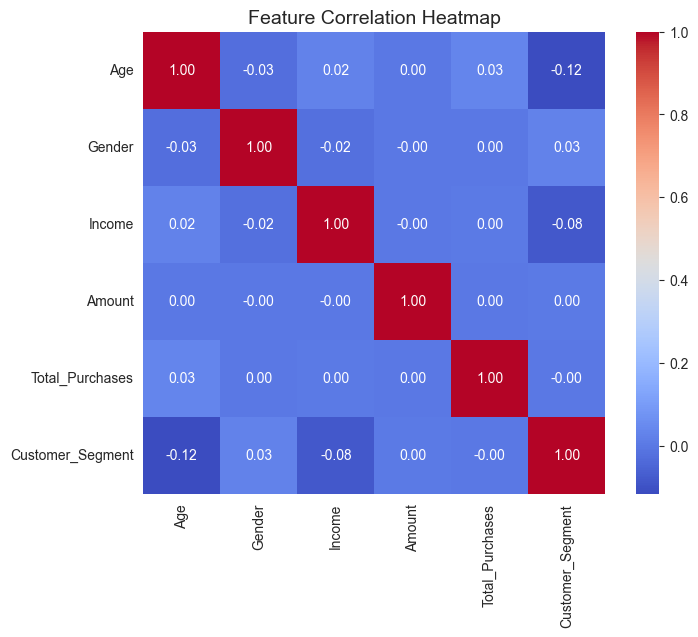

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation
numeric_cols = ["Age", "Gender", "Income", "Amount", "Total_Purchases", "Customer_Segment"]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X = df[["Age", "Gender", "Income", "Amount", "Total_Purchases"]]
y = df["Customer_Segment"]

num_cols = ["Age", "Amount", "Total_Purchases"]
X.loc[:, num_cols] = SimpleImputer(strategy="median").fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.4631967049757523

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.39      0.39     18180
           1       0.28      0.31      0.29     12834
           2       0.60      0.58      0.59     29155
           3       0.00      0.00      0.00        43

    accuracy                           0.46     60212
   macro avg       0.32      0.32      0.32     60212
weighted avg       0.47      0.46      0.47     60212



In [11]:
#SMOTE oversamples minority classes → class 3 can now be learned.